<a href="https://colab.research.google.com/github/GreatLearningAIML1/gurgaon-feb-batch-abhishek02git/blob/master/R6_ExternalLab_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
import numpy as np

In [0]:
tf.__version__

'1.14.0'

### Collect Data

In [0]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
# Check unique values in Category
print (np.unique(trainY))
print (np.unique(testY))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [0]:
# There are 10 Categories
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)
testY = tf.keras.utils.to_categorical(testY,num_classes=10)

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
print (trainX.shape)

(60000, 28, 28)


In [0]:
28*28

784

### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt

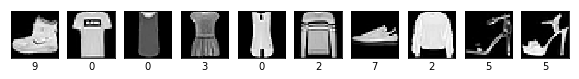

In [0]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.gray)
    plt.xlabel(int(np.where([trainY[i]==1])[1]))
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Flatten the image data from 2d to 1d --> 28X28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

W0719 05:12:33.090003 140581717538688 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Execute the model using model.fit()

In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 2047.3560 - acc: 0.7390 - val_loss: 1648.7828 - val_acc: 0.7582
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 1631.1462 - acc: 0.7801 - val_loss: 1914.8318 - val_acc: 0.7692
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 1528.2508 - acc: 0.7857 - val_loss: 1152.2556 - val_acc: 0.8047
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 1555.0162 - acc: 0.7884 - val_loss: 2202.2183 - val_acc: 0.7316
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 1510.6057 - acc: 0.7909 - val_loss: 1975.8904 - val_acc: 0.7634
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 1467.0687 - acc: 0.7967 - val_loss: 956.2186 - val_acc: 0.8266
Epoch 7/10
60000/60000 [==============================] - 6s 99us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Flatten the image data from 2d to 1d --> 28X28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5921 - acc: 0.7976 - val_loss: 0.5095 - val_acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4884 - acc: 0.8330 - val_loss: 0.4863 - val_acc: 0.8340
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4659 - acc: 0.8393 - val_loss: 0.4817 - val_acc: 0.8359
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4559 - acc: 0.8423 - val_loss: 0.4717 - val_acc: 0.8367
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4487 - acc: 0.8450 - val_loss: 0.4742 - val_acc: 0.8403
Epoch 6/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4425 - acc: 0.8462 - val_loss: 0.4669 - val_acc: 0.8408
Epoch 7/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4376 - acc: 0.8475 - val_l

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4162 - acc: 0.8565 - val_loss: 0.4561 - val_acc: 0.8441
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4172 - acc: 0.8544 - val_loss: 0.4548 - val_acc: 0.8435
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4158 - acc: 0.8565 - val_loss: 0.4522 - val_acc: 0.8452
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4142 - acc: 0.8565 - val_loss: 0.4531 - val_acc: 0.8453
Epoch 5/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4137 - acc: 0.8563 - val_loss: 0.4563 - val_acc: 0.8457
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4146 - acc: 0.8569 - val_loss: 0.4531 - val_acc: 0.8451
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4145 - acc: 0.8554 - val_l

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Flatten the image data from 2d to 1d --> 28X28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

model.add(tf.keras.layers.Dense(100, activation='sigmoid'))


#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


sgd = optimizers.SGD(lr=0.03)

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [0]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/sample - loss: 1.5523 - acc: 0.5863 - val_loss: 1.0571 - val_acc: 0.6933
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.8906 - acc: 0.7281 - val_loss: 0.7486 - val_acc: 0.7554
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.7003 - acc: 0.7616 - val_loss: 0.6366 - val_acc: 0.7789
Epoch 4/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.6156 - acc: 0.7831 - val_loss: 0.5757 - val_acc: 0.7923
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.5645 - acc: 0.7990 - val_loss: 0.5364 - val_acc: 0.8056
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.5305 - acc: 0.8120 - val_loss: 0.5093 - val_acc: 0.8154
Epoch 7/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.5025 - acc: 0.8213 - val_l

In [0]:
model.save('ex5')

In [0]:
predY = model.predict_classes(testX)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import seaborn as sns